# Multidimensional Calculos: Part 3 (continuacion)


## Valores extremos
Asuma $f=f(x,y)$. Los extremos de la funcion ocurren en:

* Puntos en la frontera
* Puntos donde $\nabla f = 0.$

Debemos verificar si estos puntos son de **maxima**, **minima**, o **silla**.

La verificacion se hace mediante la matriz Hessiana


\begin{eqnarray}
H = \begin{pmatrix} f_{xx} & f_{xy} \\ f_{yx} & f_{yy} \end{pmatrix}
\end{eqnarray}
donde $f_{xy}=\frac{\partial^2 f}{\partial x \partial y}$ y asi con los demas.  En general esta matriz es simetrica.
Llamamos $D$ al **discriminante** de la matriz Hessiana, es decir al determinante.


$$D = \det H = f_{xx} f_{yy} - f_{xy}^2  .$$
Un punto $(a,b)$ se dice que es

* **maximo local** si $f_{xx}<0$ y $D>0$.
* **minimo local** si $f_{xx}>0$ y $D>0$.
* **punto de silla** si $D<0$.
* **sin conclusion** si $D=0$.

En la proxima clase usamos el ejemplo

$$f(x,y) = \sin(x) \sin(y) .$$
Hallamos los puntos criticos en un intervalo finito.


In [5]:
import sympy as sp
from sympy import Interval, solve, solveset, S, symbols, diff
x = symbols('x', domain=Interval(0, 3/2*sp.pi))
y = symbols('y', domain=Interval(0, 3/2*sp.pi))
f = sp.sin(x)*sp.sin(y)
slns = solve( [diff(f,x), diff(f,y)])
display(slns)

[{x: 0, y: 0},
 {x: 0, y: pi},
 {x: pi/2, y: pi/2},
 {x: pi/2, y: 3*pi/2},
 {x: pi, y: 0},
 {x: pi, y: pi},
 {x: 3*pi/2, y: pi/2},
 {x: 3*pi/2, y: 3*pi/2}]

In [7]:
# para hallar el discriminante necestamos el hessiano

v = list( sp.ordered(f.free_symbols))
display(v)

[x, y]

In [9]:
H = sp.hessian(f, v)
D=sp.det(H)
D

sin(x)**2*sin(y)**2 - cos(x)**2*cos(y)**2

In [10]:
fxx = diff(f,x, 2)
fxx

-sin(x)*sin(y)

In [24]:
# lista con los fxx, D, para todos los puntos critios
Dlist = []
fxxlist = []

for i in range(len(slns)):
    Dlist.append( D.subs( [ (x, slns[i][x]), (y,slns[i][y]) ]).evalf())
    fxxlist.append( fxx.subs( [(x, slns[i][x]), (y, slns[i][y])]).evalf())

display(Dlist)
display(fxxlist)



[-1.00000000000000,
 -1.00000000000000,
 1.00000000000000,
 1.00000000000000,
 -1.00000000000000,
 -1.00000000000000,
 1.00000000000000,
 1.00000000000000]

[0,
 0,
 -1.00000000000000,
 1.00000000000000,
 0,
 0,
 1.00000000000000,
 -1.00000000000000]

In [25]:
fxxlist

[0,
 0,
 -1.00000000000000,
 1.00000000000000,
 0,
 0,
 1.00000000000000,
 -1.00000000000000]

### Actividad 1: Encuentre `Dlist` y `fxxlist` usando "list comprehension`. Esto reduce el codigo a una linea por cada uno de ellos.



In [26]:
# clasificamos los puntos en maxima, minima, saddle, no conclusive
minimaIndices=[]
maximaIndices=[]
saddleIndices=[]
inconclusiveIndices=[]


for i in range(len(slns)):
    d = D.subs( [ (x, slns[i][x]), (y, slns[i][y])]).evalf()
    if (d==0):
        inconclusiveIndices.append(i)
    elif (d<0):
        saddleIndices.append(i)
    else:
        fxx1 = fxx.subs( [ (x, slns[i][x]), (y, slns[i][y])]).evalf()
        if fxx1 < 0 :
            maximaIndices.append(i)
        else:
            minimaIndices.append(i)

print(minimaIndices)
print(maximaIndices)
print(saddleIndices)
print(inconclusiveIndices)


[3, 6]
[2, 7]
[0, 1, 4, 5]
[]


In [32]:
# la celda anterior hallos indices, ahora hallemos puntos
minima=[]
maxima=[]
saddle=[]

for i in minimaIndices:
    t = f.subs( [(x, slns[i][x]), (y, slns[i][y]) ] )
    minima.append( [slns[i][x], slns[i][y], t])

for i in maximaIndices:
    t = f.subs( [(x, slns[i][x]), (y, slns[i][y]) ] )
    maxima.append( [slns[i][x], slns[i][y], t])

for i in saddleIndices:
    t = f.subs( [(x, slns[i][x]), (y, slns[i][y]) ] )
    saddle.append( [slns[i][x], slns[i][y], t])

# control de calidad
display("minimapoints are:",minima)
display("maxmapoints are:",maxima)
display("saddlepoints are:",saddle)

'minimapoints are:'

[[pi/2, 3*pi/2, -1], [3*pi/2, pi/2, -1]]

'maxmapoints are:'

[[pi/2, pi/2, 1], [3*pi/2, 3*pi/2, 1]]

'saddlepoints are:'

[[0, 0, 0], [0, pi, 0], [pi, 0, 0], [pi, pi, 0]]

###  Graficar

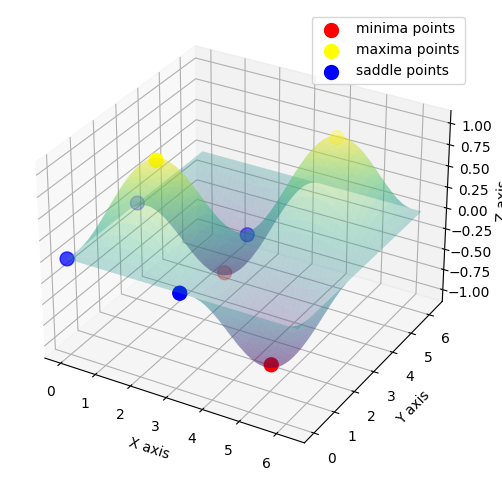

In [37]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sympy import symbols, lambdify
import numpy as np

# tamano grande
plt.rcParams["figure.figsize"]= (30,6)

# definir la superficie
z = f #

# convertir a lambdify
func = lambdify( (x,y), z, modules="numpy")

# generar los puntos da malla
x_vals = np.linspace(0, 2*np.pi, 100)
y_vals = np.linspace(0, 2*np.pi, 100)
x_mesh, y_mesh = np.meshgrid(x_vals, y_vals)
z_mesh = func(x_mesh, y_mesh)


# graficamos la superficie
fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")
ax.plot_surface( x_mesh, y_mesh, z_mesh, alpha=0.3, cmap='viridis')



# listas
xmin = []
ymin = []
zmin = []

for xpoint in minima:
    xmin.append( xpoint[0])
    ymin.append( xpoint[1])
    zmin.append( xpoint[2])


point_size=100
ax.scatter( xmin, ymin, zmin, color='red', s=point_size, label="minima points")


xmax = []
ymax = []
zmax = []

for xpoint in maxima:
    xmax.append( xpoint[0])
    ymax.append( xpoint[1])
    zmax.append( xpoint[2])


point_size=100
ax.scatter( xmax, ymax, zmax, color='yellow', s=point_size, label="maxima points")

xsad = []
ysad = []
zsad = []

for xpoint in saddle:
    xsad.append( xpoint[0])
    ysad.append( xpoint[1])
    zsad.append( xpoint[2])


ax.scatter( xsad, ysad, zsad , color='blue', s=point_size, label="saddle points")


# etiquetas y titutlos
ax.set_xlabel("X axis")
ax.set_ylabel("Y axis")
ax.set_zlabel("Z axis")


# mostramos el plot
plt.legend()
plt.show()




# Parte IV Calculo multidimensinal
## Multiplicadores de Lagrange (optimizacion)

Los multiplicadores de Lagrange se usan para optimizar funciones dadas unas restricciones. Por ejemplo queremos hallar el maximo/minimo de la funcion $f=f(x,y,z)$, con el "constrained" (restriccion) $g(x,y,z)=0$.

La solucion se da mediante las raices del sistema

$$\nabla f - \lambda \nabla g = 0. $$

**Ejemplo**: Encontrar las dimensiones de una caja con el maximo volumen y un area superficial de 64 cm$^2$.

$$f=V(x,y,z)=x y z \quad , \quad g=2xy + 2xz + 2yz - 64 $$














In [38]:
from sympy import symbols, ordered, Matrix
x, y, z = symbols('x y z ', positive=True, real=True)
f = x*y*z
g = 2*x*y + 2*x*z + 2*y*z-64
lam =symbols("lambda")

# gradiente de f
vf = list(ordered(f.free_symbols))
Df = Matrix( [f]).jacobian(vf)
Df

Matrix([[y*z, x*z, x*y]])

In [40]:
vg = list(ordered(g.free_symbols))
Dg = Matrix([g]).jacobian(vg)
Dg

Matrix([[2*y + 2*z, 2*x + 2*z, 2*x + 2*y]])

In [48]:
from sympy import solve
slns = solve ( Df - lam*Dg)
slns

[{lambda: z/4, x: z, y: z}]

Se concluye que las dimensiones son $x=y=z$, que es un cubo

### Actividad #2
Asuma una nave espacial de forma eliptica (zepelin) dada por la ecuacion

$$ 4 x^2 + y^2 + 4 z^2=16.$$
La temperatura de la superficie de la nave esta dada por la ecuacion.

$$T = 8 x^2 + 4 yz + 16 z + 600 .$$
Encuentre el punto mas caliente de la superficie de la nave.

### Integracion multiple.
#### Doble.

Un ejemplo:

$$\int_0^1 \int_0^{1 - x^2} x dy dx = \int_0^1 x(1-x^2) dx =
\left .  \frac{x^2}{2} - \frac{x^4}{4}  \right |_{0}^1 \frac12-\frac14 = \frac14.$$

In [50]:
from sympy import integrate, symbols
x,y = symbols('x   y')
f= x
I = integrate(f, (y,  1-x**2),(x,0,1))
I

1/4

### Otro ejemplo

$$\int_0^1 \int_0^{1 - x^2}  x \mathrm{e}^y dy dx = \int_0^1 x (\mathrm{e}^{1-x^2} - 1) dx = \left . -\frac{1}{2} (\mathrm{e}^{1 - x^2} - x^2) \right |_0^1$$.

$u=1-x^2$, $du=-2x dx$, $dx=-\frac12 du$,


$$-\frac12 - \frac12 + \frac12 \mathrm{e}= -1 + \frac{\mathrm{e}}{2} .$$

In [52]:
import sympy as sp
f = x*sp.exp(y)
I = integrate( f, (y, 0, 1-x**2), (x, 0 ,1))
I

-1 + E/2

In [53]:
I.evalf()

0.359140914229523

In [54]:
# una que no se puede
f = sp.exp(x**2)*sp.sin(y)
I = integrate(f, (y, 0, 1-x**2), (x, 0, 1))
I

-Integral(exp(x**2)*cos(x**2 - 1), (x, 0, 1)) - Integral(-exp(x**2), (x, 0, 1))

In [55]:
# otra
from sympy import pi
f = sp.exp(-y**2)
I = integrate(f, (y, 0, sp.sin(pi*x)), (x, 0, 1))
I

sqrt(pi)*Integral(erf(sin(pi*x)), (x, 0, 1))/2

#### Volumen de una esfera de radio R

$$ V = 8 \int_0^R \int_0^{\sqrt{R^2 - x^2}} f(x,y) dy dx .$$
donde $f(x,y) = \sqrt{R^2 - x^2 - y^2}$.









In [57]:
# volumen de la esfera
import time
start =time.time()

from sympy import sqrt
R = symbols('R', constant=True) # radio
f = sqrt(R**2 - x**2 - y**2)
I = integrate( f, (y, 0, sqrt(R**2 - x**2)), (x, 0, R))
end = time.time()

print("timing for this was, ", end-start)
I


timing for this was,  934.7696526050568


Piecewise((-Integral(Piecewise((-Integral(2*I*R**2*y*(R**2 - x**2)*acosh(y/sqrt(polar_lift(R**2 - x**2)))/((-4*R**2*sqrt(y**2/polar_lift(R**2 - x**2) - 1) + 4*x**2*sqrt(y**2/polar_lift(R**2 - x**2) - 1))*sqrt(y**2/polar_lift(R**2 - x**2) - 1)*polar_lift(R**2 - x**2)) - pi*R**2*y*(R**2 - x**2)/((-4*R**2*sqrt(y**2/polar_lift(R**2 - x**2) - 1) + 4*x**2*sqrt(y**2/polar_lift(R**2 - x**2) - 1))*sqrt(y**2/polar_lift(R**2 - x**2) - 1)*polar_lift(R**2 - x**2)) + 2*I*R**2*y*(4*R**2*y/(sqrt(y**2/polar_lift(R**2 - x**2) - 1)*polar_lift(R**2 - x**2)) - 4*x**2*y/(sqrt(y**2/polar_lift(R**2 - x**2) - 1)*polar_lift(R**2 - x**2)))*sqrt(polar_lift(R**2 - x**2))/(-4*R**2*sqrt(y**2/polar_lift(R**2 - x**2) - 1) + 4*x**2*sqrt(y**2/polar_lift(R**2 - x**2) - 1))**2 + 2*I*R**2*(R**2 - x**2)*sqrt(y**2/polar_lift(R**2 - x**2) - 1)/((-4*R**2*sqrt(y**2/polar_lift(R**2 - x**2) - 1) + 4*x**2*sqrt(y**2/polar_lift(R**2 - x**2) - 1))*sqrt(y/sqrt(polar_lift(R**2 - x**2)) - 1)*sqrt(y/sqrt(polar_lift(R**2 - x**2)) + 1)*sqr

In [59]:
display(I)

Piecewise((-Integral(Piecewise((-Integral(2*I*R**2*y*(R**2 - x**2)*acosh(y/sqrt(polar_lift(R**2 - x**2)))/((-4*R**2*sqrt(y**2/polar_lift(R**2 - x**2) - 1) + 4*x**2*sqrt(y**2/polar_lift(R**2 - x**2) - 1))*sqrt(y**2/polar_lift(R**2 - x**2) - 1)*polar_lift(R**2 - x**2)) - pi*R**2*y*(R**2 - x**2)/((-4*R**2*sqrt(y**2/polar_lift(R**2 - x**2) - 1) + 4*x**2*sqrt(y**2/polar_lift(R**2 - x**2) - 1))*sqrt(y**2/polar_lift(R**2 - x**2) - 1)*polar_lift(R**2 - x**2)) + 2*I*R**2*y*(4*R**2*y/(sqrt(y**2/polar_lift(R**2 - x**2) - 1)*polar_lift(R**2 - x**2)) - 4*x**2*y/(sqrt(y**2/polar_lift(R**2 - x**2) - 1)*polar_lift(R**2 - x**2)))*sqrt(polar_lift(R**2 - x**2))/(-4*R**2*sqrt(y**2/polar_lift(R**2 - x**2) - 1) + 4*x**2*sqrt(y**2/polar_lift(R**2 - x**2) - 1))**2 + 2*I*R**2*(R**2 - x**2)*sqrt(y**2/polar_lift(R**2 - x**2) - 1)/((-4*R**2*sqrt(y**2/polar_lift(R**2 - x**2) - 1) + 4*x**2*sqrt(y**2/polar_lift(R**2 - x**2) - 1))*sqrt(y/sqrt(polar_lift(R**2 - x**2)) - 1)*sqrt(y/sqrt(polar_lift(R**2 - x**2)) + 1)*sqr

In [65]:
from sympy import init_printing

init_printing()

print(I)

Piecewise((-Integral(Piecewise((-Integral(2*I*R**2*y*(R**2 - x**2)*acosh(y/sqrt(polar_lift(R**2 - x**2)))/((-4*R**2*sqrt(y**2/polar_lift(R**2 - x**2) - 1) + 4*x**2*sqrt(y**2/polar_lift(R**2 - x**2) - 1))*sqrt(y**2/polar_lift(R**2 - x**2) - 1)*polar_lift(R**2 - x**2)) - pi*R**2*y*(R**2 - x**2)/((-4*R**2*sqrt(y**2/polar_lift(R**2 - x**2) - 1) + 4*x**2*sqrt(y**2/polar_lift(R**2 - x**2) - 1))*sqrt(y**2/polar_lift(R**2 - x**2) - 1)*polar_lift(R**2 - x**2)) + 2*I*R**2*y*(4*R**2*y/(sqrt(y**2/polar_lift(R**2 - x**2) - 1)*polar_lift(R**2 - x**2)) - 4*x**2*y/(sqrt(y**2/polar_lift(R**2 - x**2) - 1)*polar_lift(R**2 - x**2)))*sqrt(polar_lift(R**2 - x**2))/(-4*R**2*sqrt(y**2/polar_lift(R**2 - x**2) - 1) + 4*x**2*sqrt(y**2/polar_lift(R**2 - x**2) - 1))**2 + 2*I*R**2*(R**2 - x**2)*sqrt(y**2/polar_lift(R**2 - x**2) - 1)/((-4*R**2*sqrt(y**2/polar_lift(R**2 - x**2) - 1) + 4*x**2*sqrt(y**2/polar_lift(R**2 - x**2) - 1))*sqrt(y/sqrt(polar_lift(R**2 - x**2)) - 1)*sqrt(y/sqrt(polar_lift(R**2 - x**2)) + 1)*sqr